### Exploratory Data Analysis
Introduction: Exploratory Data Analysis (EDA) is a critical first step that allows PowerCo to understand its customer data and identify patterns that can directly impact business performance, especially in the areas of energy supply, customer satisfaction, and retention.

By analyzing usage trends, billing behavior, and service interactions, PowerCo can:

Forecast demand more accurately Understanding electricity and gas consumption patterns (e.g., seasonal spikes, high-usage regions) helps optimize supply planning and reduce over/under-distribution.

Detect abnormal usage or system inefficiencies EDA can reveal anomalies in energy consumption which may point to faulty meters, energy theft, or inefficient supply—allowing PowerCo to intervene early.

Segment customers for smarter supply strategies Identifying customer groups (e.g., heavy users vs. low-income households) supports tailored pricing, energy-saving programs, and demand-side management.

Improve customer retention through insights Analyzing billing delays, support complaints, and usage drops helps uncover early warning signs of churn, allowing PowerCo to take proactive steps.

Enhance operational efficiency Insights from EDA guide better resource allocation, targeted infrastructure maintenance, and policy improvements that align with customer behavior.

In summary, EDA helps PowerCo move from reactive operations to proactive decision-making, ensuring more reliable energy supply, better customer experiences, and stronger business outcomes.

In [1]:
# import important libs
import pandas as pd # for data manipualtion and analysis
import numpy as np # for mathematical computation
import seaborn as sns # for visualization
import matplotlib.pyplot as plt
# to show plots in jupyter notebook
%matplotlib inline 

sns.set(color_codes = True) #set plot style

import warnings
warnings.filterwarnings('ignore') # to remove warnings

### Loading data with Pandas
We need to load client_data.csv and price_data.csv into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks.

In [3]:
client_df = pd.read_csv('client_data (1).csv') 
price_df = pd.read_csv('price_data (1).csv')

In [4]:
# chechking the first 5 rolls of the client data
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
# checking the dimentionality
client_df.shape

(14606, 26)

### Observation
There are 26 columns and 14,606 rows and lots of zeros which could mean missing values

should be treated during data cleaning or preporcessing

In [6]:
# checking the detailed infomation
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

Observation
id, channel_sales and origin up has no meaning and should be dropped during data cleaning or preprocessing as the have no influence in predicting customer churn The date columns should be changed from object to datat datatype and the has_gas column should be change to category

In [7]:
# examine the features(columns)
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

### Meaning of each columns for client list
id = client company identifier ● activity_new = category of the company’s activity ● channel_sales = code of the sales channel ● cons_12m = electricity consumption of the past 12 months ● cons_gas_12m = gas consumption of the past 12 months ● cons_last_month = electricity consumption of the last month ● date_activ = date of activation of the contract ● date_end = registered date of the end of the contract ● date_modif_prod = date of the last modification of the product ● date_renewal = date of the next contract renewal ● forecast_cons_12m = forecasted electricity consumption for next 12 months ● forecast_cons_year = forecasted electricity consumption for the next calendar year ● forecast_discount_energy = forecasted value of current discount ● forecast_meter_rent_12m = forecasted bill of meter rental for the next 12 months ● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak) ● forecast_price_energy_peak = forecasted energy price for 2nd period (peak) ● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak) ● has_gas = indicated if client is also a gas client ● imp_cons = current paid consumption ● margin_gross_pow_ele = gross margin on power subscription ● margin_net_pow_ele = net margin on power subscription ● nb_prod_act = number of active products and services ● net_margin = total net margin ● num_years_antig = antiquity of the client (in number of years) ● origin_up = code of the electricity campaign the customer first subscribed to ● pow_max = subscribed power ● churn = has the client churned over the next 3 months

#### Observation
activity_new is not part of the data provided by PowerCo as found in the data description

there are 26 columns in the dataset but 27 columns in the data description

In [8]:
# Numerical and Statistical Analysis

client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


### Observation

* cons_12m: Customers consumed an average of ~159,220 units of energy over the past 12 months, but usage varies a lot, with some extremely high values.

* cons_gas_12m: Most customers didn't use gas (median = 0), but a few had very high gas consumption, pulling the average up.

* cons_last_month: Recent energy usage is low for most, with a median under 800 units, but a few customers used a large amount last month.

* forecast_cons_12m: The company forecasted ~1,869 units on average for the year, much lower than actual past consumption, suggesting possible underestimation.

* forecast_cons_year: Many customers had zero or very low forecasted annual consumption, again showing under-prediction for some customers.

* forecast_discount_energy: Most customers had no forecasted discounts; only a few received significant discounts (up to 30).

* forecast_meter_rent_12m: Annual meter rent averaged about 63, with a wide range, indicating different plans or regions.

* forecast_price_energy_off_peak: Off-peak energy prices are low and tightly clustered around 0.14, with little variation.

* forecast_price_energy_peak: Peak energy prices vary more; some customers may not have peak pricing (many zeros).

* forecast_price_pow_off_peak: Off-peak power prices center around 43–44, with some variation up to ~59.

* imp_cons: Imported energy is zero for many customers but very high for a few, showing outliers or special cases.

* margin_gross_pow_ele: The company earns about 25 units gross margin per customer, though it varies widely.

* margin_net_pow_ele: Net margin is similar to gross, indicating low deductions or operating costs.

* nb_prod_act: Most customers have only one active product, but some have up to 32, possibly commercial accounts.

* net_margin: Profit per customer is about 189 on average, but some bring in very high profits (over 24,000), showing big differences in value.

* num_years_antig: Customers have been with PowerCo for about 5 years on average.

* pow_max: The maximum power capacity used averages 18 kW, with a few customers using much more (up to 320).

* churn: About 9.7% of customers have churned, meaning churn is a minority class in this dataset

In [9]:
# categorical Statistical Analysis
client_df.describe(include = ['object','bool'])

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
count,14606,14606,14606,14606,14606,14606,14606,14606
unique,14606,8,1796,368,2129,386,2,6
top,563dde550fd624d7352f3de77c0cdfcd,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-01,2016-02-01,2015-11-01,2015-06-23,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,95,145,721,587,11955,7097


### Observation
* id: Every customer has a unique ID (14,606 unique entries), used for identification.

* channel_sales: There are 8 different sales channels; one channel (foosdfpfkusacimwkcsosbicdxkicaua) is the most common, used by nearly half the customers (6,754).

* date_activ: Customers were activated on 1,796 different dates; the most common activation date was August 1, 2009, with 95 activations.

* date_end: Contracts ended on 368 different dates, with February 1, 2016 being the most common (145 terminations).

* date_modif_prod: Product modifications happened on 2,129 dates; most frequently on November 1, 2015 (721 changes).

* date_renewal: Renewal dates span 386 unique dates, most commonly June 23, 2015 (587 customers renewed).

* has_gas: This is a binary flag—about 82% of customers (f) don’t have a gas contract; only ~18% (t) do.

* origin_up: There are 6 sources from which customers signed up, with the most common being lxidpiddsbxsbosboudacockeimpuepw, used by 7,097 customers (~49%).

### Data Cleaning and Preprocessing for Client Data

In [10]:
client_df.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0


In [11]:
client_df.dtypes # checking data types

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [12]:
# dropping columns with no relevant information
client_df=client_df.drop(columns=['channel_sales','origin_up'],axis=1)

In [13]:
# changing has_gas column to categorical datatype
client_df['has_gas'] = client_df['has_gas'].astype('category')

import datetime
# changing date column datatype to datetime
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_end']= pd.to_datetime(client_df['date_end'])
client_df['date_modif_prod']= pd.to_datetime(client_df['date_modif_prod'])
client_df['date_renewal']= pd.to_datetime(client_df['date_renewal'])

In [14]:
client_df.dtypes

id                                        object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                 category
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act                                int64
net_margin          

In [15]:
# checking missing values
client_df.isnull().sum()

id                                0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
pow_max                           0
churn                             0
dtype: int64

#### Observation
There are no null values but the lots of zeros in the columns which could mean missing values should be sorted during final preporcessing

In [17]:
client_df.duplicated().sum()

0

### Data Visualization for Client Data

In [18]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

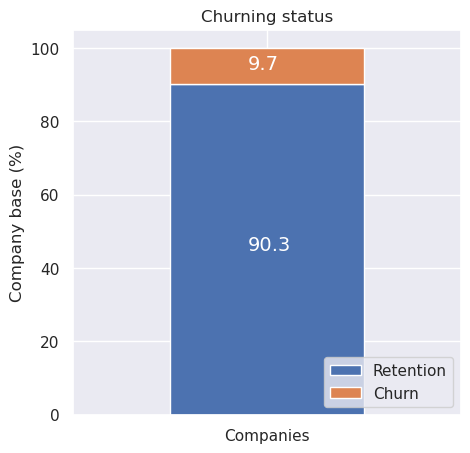

In [19]:
# Visualizing churn rate
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

### Observation
* Retention Rate: 90.3%
This indicates that 90.3% of companies successfully retained their customers during the observed period, suggesting strong customer engagement and satisfaction.

* Churn Rate: 9.7%
Only 9.7% of companies experienced customer churn, meaning they lost a portion of their customer base.

* Interpretation:
A high retention rate of 90.3% reflects strong performance in customer satisfaction, service quality, or perceived product value.
The low churn rate of 9.7% indicates minimal customer loss, which is generally a positive sign for business stability and long-term growth.

* Business Insight:
The company is doing well in maintaining its customer base. However, analyzing the 9.7% churn segment could reveal valuable insights into potential issues and help fine-tune strategies to further improve customer retention.

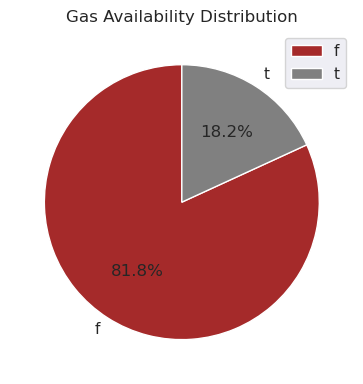

In [20]:
## visualization relating to gas periods: this relate to number of days gas was/was not available at the station
gas_count = client_df['has_gas'].value_counts()
plt.figure(figsize=(8, 4), dpi=100)
gas_count.plot(
    kind='pie',
    autopct='%1.1f%%',  # Show one decimal place
    colors=['brown', 'gray'],  # Optional: specify two colors for True/False or 1/0
    startangle=90,         # Optional: starts pie from the top
    legend=True,          # show legend
    ylabel=''              # Removes default y-axis label
)
plt.title("Gas Availability Distribution")
plt.tight_layout()
plt.show()

#### Observation
The visualization reveals that PowerCo station experiences more days without gas than with gas availability.

Implication:
This inconsistency can lead to customer frustration, a sense of disappointment or betrayal, and may prompt customers to churn—especially those who travel long distances expecting service.

Business Impact:
Frequent gas unavailability can significantly harm customer satisfaction and erode loyalty, ultimately threatening long-term retention and brand reputation.

In [21]:
client_df.columns

# saving all numerical columns in variable
num_data = client_df.filter(['forecast_cons_12m','forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak','imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max'])

# reducing decimal values
num_data = round(num_data,1)
num_data.head(3)

,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
0,0.0,0,0.0,1.8,0.1,0.1,40.6,0.0,25.4,25.4,2,679.0,3,43.6
1,190.0,0,0.0,16.3,0.1,0.0,44.3,0.0,16.4,16.4,1,18.9,6,13.8
2,48.0,0,0.0,38.7,0.2,0.1,44.3,0.0,28.6,28.6,1,6.6,6,13.9


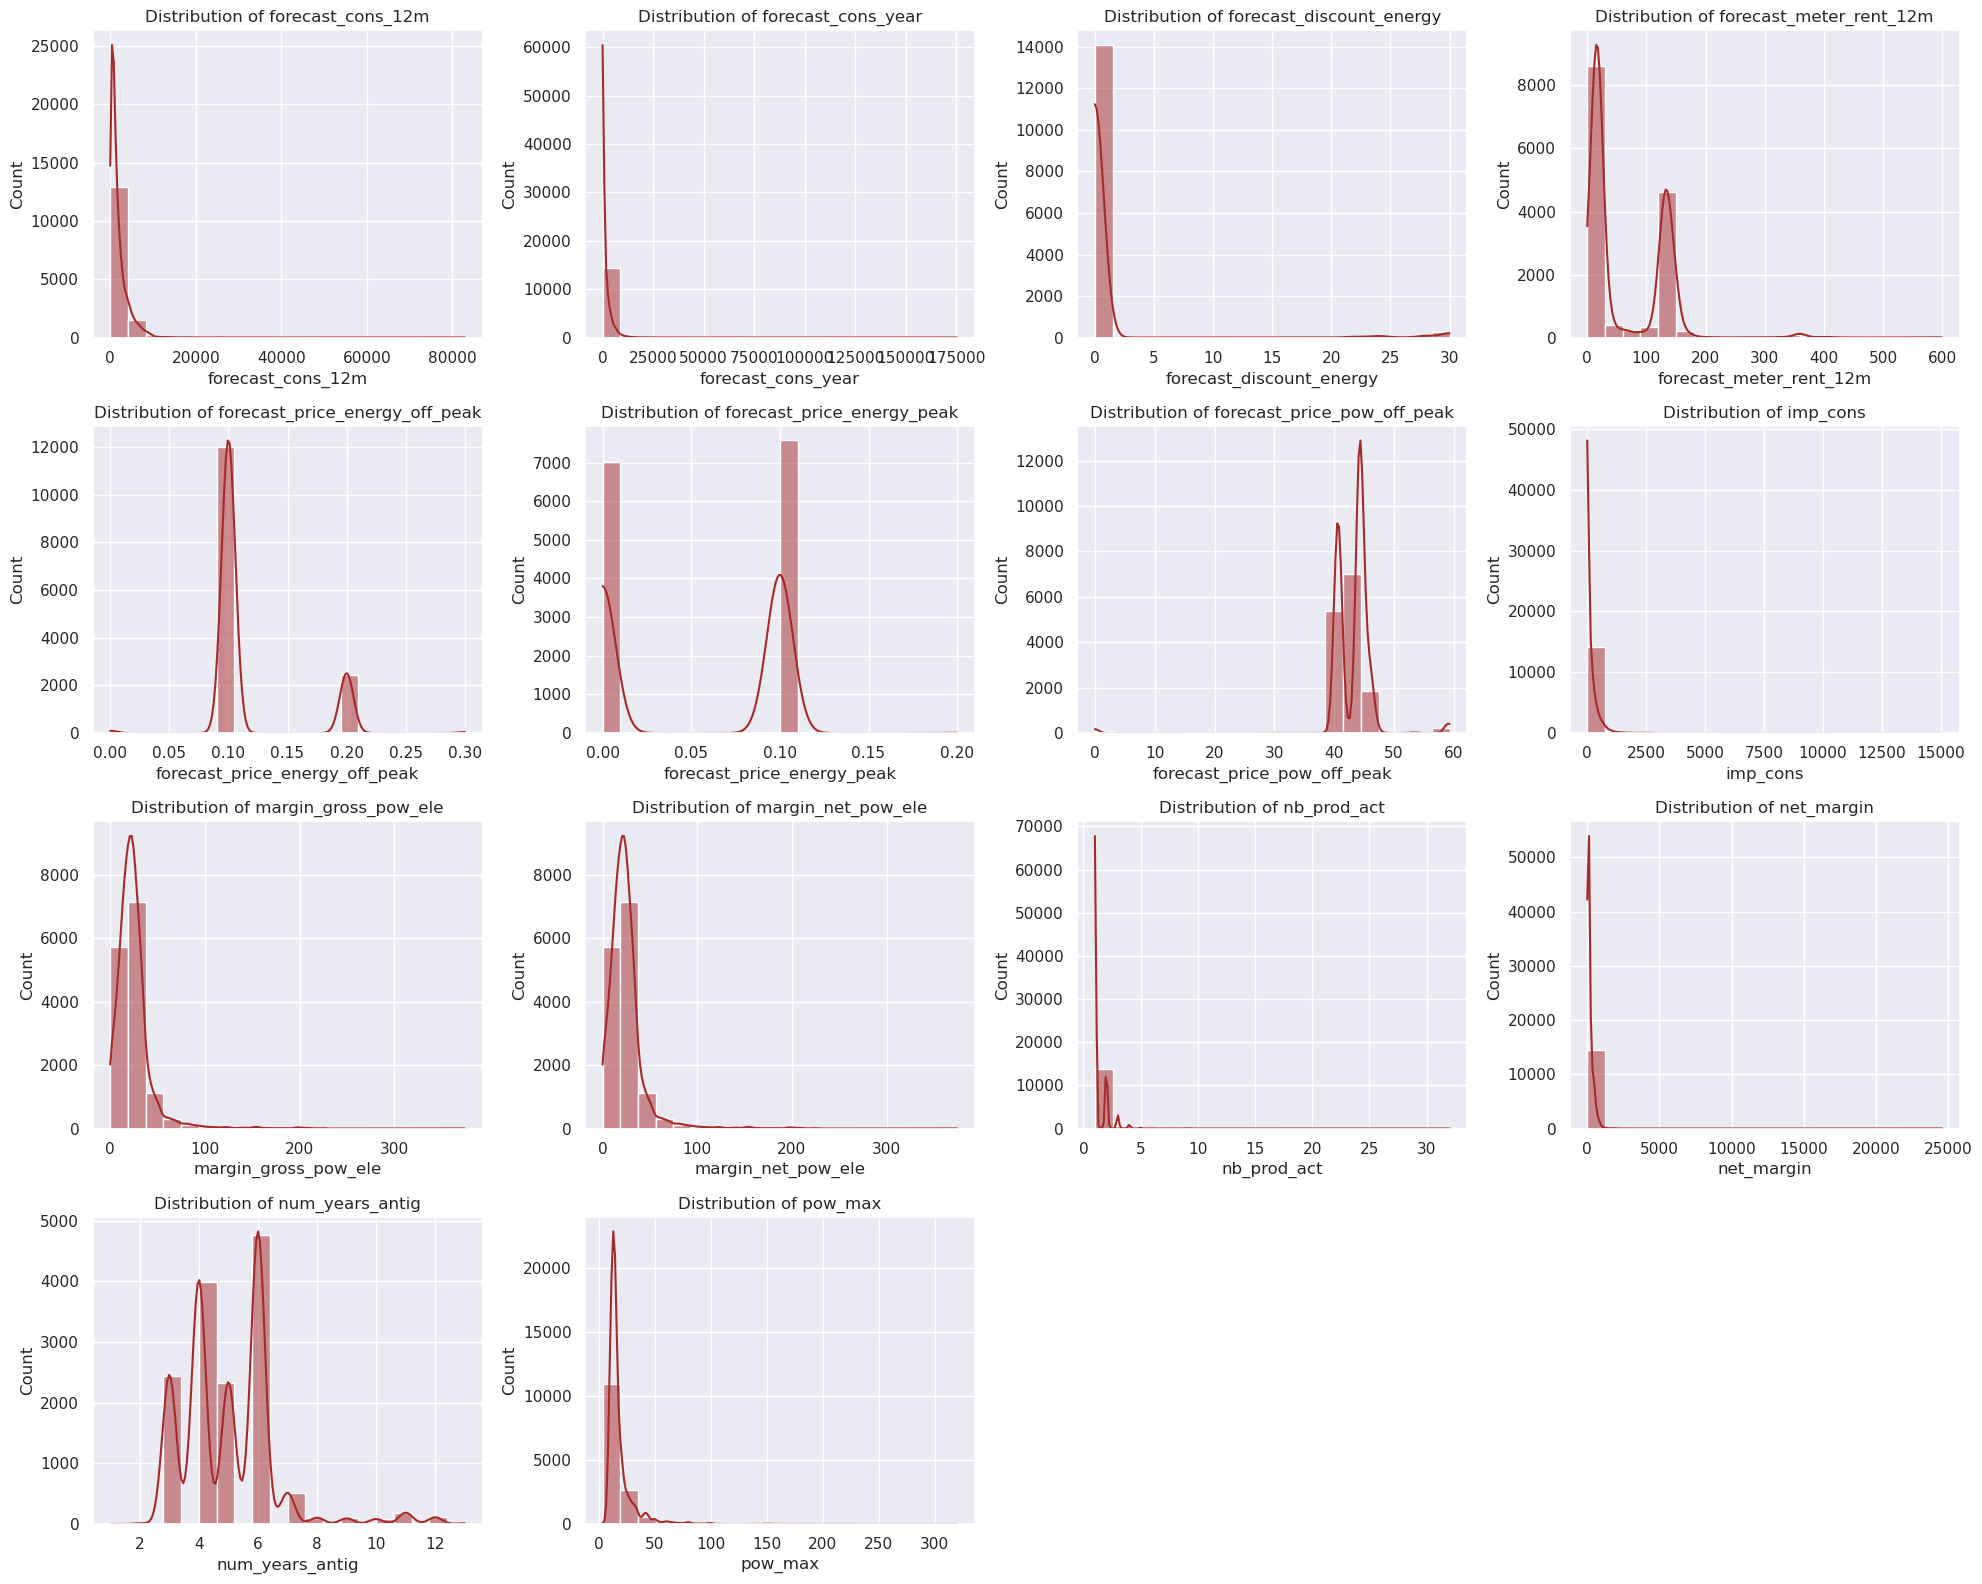

In [22]:
# import math module
import math

# function to plot all distributions
def plot_all_distributions(df, bins=20):
    numeric_cols = df.select_dtypes(include='number').columns
    n_cols = 4  # number of plots per row
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col].dropna(), bins=bins, ax=axes[i], kde=True, color='brown')
        axes[i].set_title(f'Distribution of {col}')
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# plot all distributions
plot_all_distributions(num_data)


### Observations

General Pattern – Highly Skewed Distributions:
Many variables such as forecast_cons_12m, forecast_cons_year, forecast_meter_rent_12m, imp_cons, net_margin, and pow_max exhibit right-skewed distributions.
This indicates that most data points are concentrated at lower values, while a few extreme outliers have very high values.

Recommendation:
These skewed variables should be normalized or transformed (e.g., log transformation) before feeding them into machine learning models to improve accuracy and model performance.

Interpretation of Individual Distributions:

forecast_cons_12m, forecast_cons_year:
Strong right skew. Most customers have low forecasted consumption, with a few outliers likely representing large industrial clients.

forecast_discount_energy, forecast_meter_rent_12m:
Still skewed, but within a narrow range. Suggests most customers receive minimal discounts and pay low rent.

forecast_price_energy_off_peak, forecast_price_energy_peak:
Bimodal or multi-modal distributions indicate tiered pricing structures or segmentation by customer type.

forecast_price_pow_off_peak:
Multiple spikes between 30 and 60 may reflect specific pricing contracts or predefined tiers.

imp_cons:
Strongly right-skewed. Most customers have low energy usage, while a few consume significantly more.

nb_prod_act:
Extremely right-skewed. Most customers have few production activities; a small group is highly active.

margin_net_pow_ele, margin_gross_pow_ele, net_margin:
Skewed toward zero, indicating that many customers yield low or even negative profit margins.

num_years_antig:
Multimodal with peaks at rounded values (e.g., 3, 5, 6 years), likely reflecting common contract lengths or customer lifecycle stages.

pow_max:
Majority of customers have low maximum power demand, though a few reach up to 300—indicating diverse customer sizes and energy needs.

Business Insight:
These patterns can inform a more targeted churn prediction strategy. For example, customers with high consumption but low margins or those nearing typical churn cycle durations (e.g., 3 or 5 years) may require focused retention efforts.

### Basic over view and exploration of price data

In [23]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [24]:
price_df.shape

(193002, 8)

### Observation
1. Common column between price_df and client_df (id)
2. multiple price columns and a single data price column which means we can conduct both single and multi-series analysis
3. The price columns can be classified into two category which are Fixed price and Variable price

### Observation
There are 193002 rows and 8 columns also there are lots of zeros which could mean missing values. Should be handled during data preprocessing.

In [25]:
# checking for details information on price data
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [26]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


#### Observation
Variable price
price_off_peak_var is the highest on average, with a relatively small standard deviation → most customers pay similar variable rates during off-peak times.

price_peak_var and price_mid_peak_var have a median of 0, meaning more than 50% of customers pay no variable charges during those periods.

Skewness: For both peak and mid-peak, many users pay nothing, while a smaller group pays significantly more (seen from max values like 0.2298 and 0.1141).

Variable Price
price_off_peak_fix is consistently high across the dataset — all percentiles (25%, 50%, 75%) are around 40–44, indicating most users pay a flat rate during off-peak periods.

price_peak_fix and price_mid_peak_fix have a median of 0, meaning the majority of users do not pay fixed charges for these periods.

However, the 75th percentile for both is quite high, suggesting that a subset of users pay substantial fixed prices for peak and mid-peak times.

KeyNote
price_off_peak_fix is consistently high across the dataset — all percentiles (25%, 50%, 75%) are around 40–44, indicating most users pay a flat rate during off-peak periods.

price_peak_fix and price_mid_peak_fix have a median of 0, meaning the majority of users do not pay fixed charges for these periods.

However, the 75th percentile for both is quite high, suggesting that a subset of users pay substantial fixed prices for peak and mid-peak times.

RECOMENDATION
Consider visualizing the distribution of each column using histograms or KDE plots to confirm these patterns.

we should/might also segment customers based on their non-zero values in price_peak_fix/var to study behavioral differences.

If we are modeling, we can/should treat these zero-heavy variables carefully — e.g., by splitting them into binary + numeric (e.g., "has_peak_price", "peak_price_amount").

In [27]:
# Categorical Statistical Analysis
price_df.describe(include = ['object','bool'])

,id,price_date
count,193002,193002
unique,16096,12
top,cce1215d5c9330d9098f8fbcb62bd261,2015-12-01
freq,12,16094


#### Data Cleaning and Preprocessing for price Data

In [28]:
price_df.head(2)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [30]:
price_df.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

In [31]:
### changing price date column datatype to datetime

price_df['price_date']=pd.to_datetime(price_df['price_date'])

In [32]:
price_df.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

In [33]:
# checking of null values and missing values
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [34]:
# checking of duplicates in the data 
price_df.duplicated().sum()

0

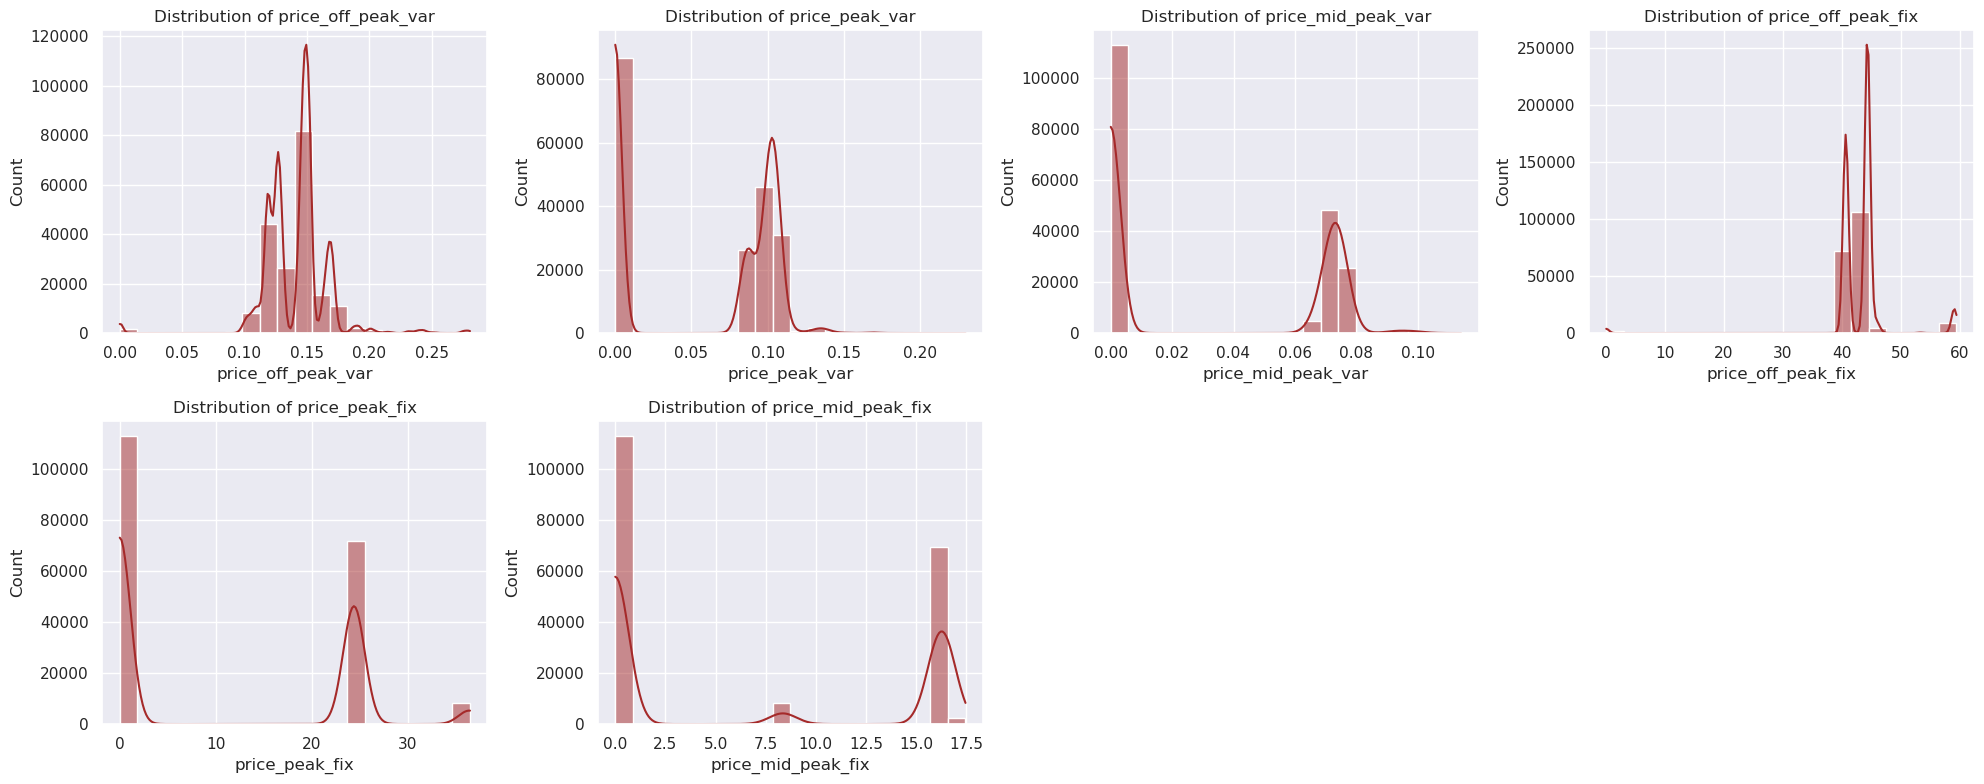

In [35]:
# Data visualization for price data 
plot_all_distributions(price_df.drop(columns = ['id','price_date'],axis = 1))

### Observation

price_off_peak_var This feature shows a strong central concentration between 0.12 and 0.16, with a few minor peaks, indicating that most customers are charged a similar variable rate for off-peak energy. There are some small tails and outliers, suggesting rare usage of slightly lower or higher rates, possibly due to promotional pricing, old plans, or errors.

price_peak_var This distribution has two clear clusters—one near 0.04 and another near 0.10. This indicates that there are two major pricing tiers for peak variable rates, possibly from different contract types or pricing updates over time. The plot is fairly narrow around these peaks, suggesting little variation within each tier.

price_mid_peak_var This plot shows a very sharp peak around 0.07 to 0.08, with almost no spread. This suggests that nearly all customers who have a mid-peak variable rate are on the same or very similar rate, reinforcing the idea of standardized pricing.

price_off_peak_fix There’s a strong peak between 40 and 45, with the majority of customers concentrated here. This fixed charge for off-peak usage seems to be highly standardized, indicating it’s part of a base plan that applies to most customers. A few customers fall outside this range, indicating some special cases or older contracts.

price_peak_fix There’s a dominant cluster around 27 to 30, but with a secondary smaller peak near 33 to 34. This suggests that there may be a main fixed charge tier, and a secondary option (perhaps a newer or legacy plan). The distribution is more varied than price_off_peak_fix.

price_mid_peak_fix This one is clearly bimodal, with one peak around 6–8 and another around 16–17. This shows that customers who pay a mid-peak fixed charge fall into two very distinct categories. This might reflect basic vs. premium plans, or two separate customer groups like residential and commercial users.

* Summary of First Image:

The pricing system is not continuous but instead clustered at fixed price points, indicating preset tariffs.

Off-peak prices (both fixed and variable) are the most standardized.

Peak and mid-peak rates show clear segmentation, likely reflecting different plans or customer types.

* This structured pricing can be leveraged in churn models by engineering categorical features or grouping tariffs into meaningful tiers.

In [36]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [37]:
## splittng numerical features into bianry
num_feat = ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']
for col in num_feat:
    price_df[f'{col}_applied'] = price_df[col] > 0
    price_df[f'{col}_nonzero'] = price_df[col].where(price_df[col] > 0)


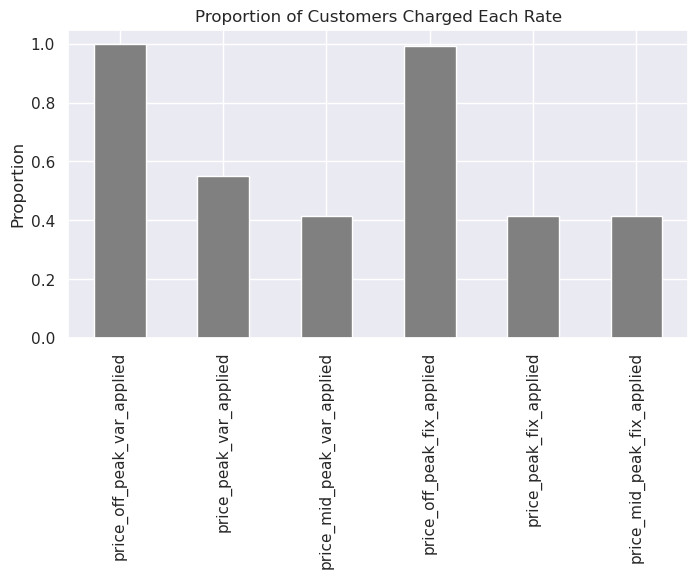

In [39]:
# visuaizing binary features
binary_cols = [col for col in price_df.columns if col.endswith('_applied')]
price_df[binary_cols].mean().plot(kind='bar', color = 'grey', figsize=(8, 4), title='Proportion of Customers Charged Each Rate')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.show()